In [1]:
import numpy as np, pandas as pd
import re, random, os

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

### Reading in the reviews data file

In [2]:
inp0 = pd.read_csv('Tap Reviews.csv')
inp0.head()

,asins,name,reviews.numHelpful,reviews.rating,reviews.text,reviews.title
0,B01BH83OOM,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,806,5,IMPORTANT UPDATE (3/8/17): As you read my orig...,"The Echo's Little Sister Is AMAZING!! 3,"
1,B01BH83OOM,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,426,5,It was just a few weeks ago that I was bemoani...,Tap Alexa on the go!
2,B01BH83OOM,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,295,5,The Amazon Tap is a portable Bluetooth speaker...,Amazon Tap Review - Best Bluetooth Speaker in ...
3,B01BH83OOM,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,0,5,Look at this product as a portable speaker fir...,Great for what it does
4,B01BH83OOM,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,3,5,This Amazon tap is not only a great Bluetooth ...,"Awesome, smart little portable speaker"


In [4]:
inp0.columns

Index(['asins', 'name', 'reviews.numHelpful', 'reviews.rating', 'reviews.text',
       'reviews.title'],
      dtype='object')

#### This has a lot of extra columns - we are concerned only with the field reviews.text.  
#### Store the review text into a list for easy manipulation.

In [5]:
reviews0 = inp0['reviews.text'].values

In [7]:
len(reviews0)

542

In [8]:
type(reviews0)

numpy.ndarray

In [9]:
reviews0[3]

'Look at this product as a portable speaker first and an Echo replacement second. The big reason to buy this over standard Bluetooth speakers is this has WiFi streaming enabled. When you are at home you can stream music with ease to it. Voice recognition is top notch and it really shines when using it with other smart home accessories. The only problem is having to tap the microphone button for it to listen to your voice. If you want bigger sound and always listening features, spend the extra money on the Amazon Echo.'

#### We can see that each review has multiple sentences.  
#### For any Part of Speech tagger to work effectively, we need to separate the sentences.
- We'll need to use sent_tokenize to separate the sentences, then use word_tokenize to tokenize each resulting sentence into constituent words
- Let's first do this for a single sentence, and then make a function

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [11]:
sent_tokenize(reviews0[3])

['Look at this product as a portable speaker first and an Echo replacement second.',
 'The big reason to buy this over standard Bluetooth speakers is this has WiFi streaming enabled.',
 'When you are at home you can stream music with ease to it.',
 'Voice recognition is top notch and it really shines when using it with other smart home accessories.',
 'The only problem is having to tap the microphone button for it to listen to your voice.',
 'If you want bigger sound and always listening features, spend the extra money on the Amazon Echo.']

Doing this for all the reviews

In [12]:
review_sents = [sent_tokenize(review) for review in reviews0]

In [13]:
len(review_sents)

542

In [14]:
review_sents[:3]  # looking into the 1st 3 reviews

[['IMPORTANT UPDATE (3/8/17): As you read my original review, please be aware that Amazon announced in early February (2017) a new firmware update that allows Amazon Tap owners to enable a hands-free option!',
  'By going into Settings in the Alexa app, you can now choose the hands-free option and have your Tap respond to voice commands without touching it, just like the Echo and Echo Dot!',
  'This is a fabulous development and something Tap owners have been hoping for.',
  'Thank you, Amazon!Since the lack of hands-free operation was the one major shortcoming of the Tap, this wonderful little device has now gotten a whole lot better.',
  'One thing to keep in mind, though, especially if you use your Tap on battery power: The hands-free mode will drain the battery more quickly, because it requires the microphone to be on at all times.',
  'But since you can easily toggle between hands-free or regular tap mode using the Alexa app, you can pick and choose how you want to use your Tap fo

##### Each Review has been broken into constituent sentences. We need to further break into individual words.

For a single sentence - 

In [17]:
review_sents[2]  #3rd Review

['The Amazon Tap is a portable Bluetooth speaker that can be controlled with your voice.',
 'You can instruct it to play music, order products and services, control home automation products and connected devices, plus a whole lot more.It contains a button activated microphone for listening to your verbal commands.',
 'It also has Dolby stereo speakers for playing music.',
 'The Amazon Tap is basically the portable version of the popular Amazon Echo that was released last year.Ive been testing the Tap for several days now.',
 'Heres what I think so far: What I Like I find that the Tap understands my verbal commands accurately.',
 'This could be due to the fact that, since its button activated, Im always very close to the device when I speak to it.',
 'Nevertheless, its nice that Tap understands me the first time.',
 'This was my experience with the Amazon Echo as well.The audio is surprisingly good for such a small device.',
 'I test portable speakers all the time and Id say the Amazon 

In [16]:
review_sents[2][0]  # 1st sentence of the 3rd Review

'The Amazon Tap is a portable Bluetooth speaker that can be controlled with your voice.'

In [15]:
word_tokenize(review_sents[2][0])  # Tokenzing the 1st sentence of the 3rd Review into a list of words

['The',
 'Amazon',
 'Tap',
 'is',
 'a',
 'portable',
 'Bluetooth',
 'speaker',
 'that',
 'can',
 'be',
 'controlled',
 'with',
 'your',
 'voice',
 '.']

#### Let's create a new list that contains all the tokenized sentences

In [18]:
# Creating an empty list >>> to combine all the word-tokenized-sentences into one big list
reviews_tokens = []

In [19]:
for review in review_sents:
    for sent in review:
        reviews_tokens.append(word_tokenize(sent))

In [20]:
len(reviews_tokens)  # this means 542 reviews contained 1627 sentences in total!

1627

In [21]:
reviews_tokens[0]

['IMPORTANT',
 'UPDATE',
 '(',
 '3/8/17',
 ')',
 ':',
 'As',
 'you',
 'read',
 'my',
 'original',
 'review',
 ',',
 'please',
 'be',
 'aware',
 'that',
 'Amazon',
 'announced',
 'in',
 'early',
 'February',
 '(',
 '2017',
 ')',
 'a',
 'new',
 'firmware',
 'update',
 'that',
 'allows',
 'Amazon',
 'Tap',
 'owners',
 'to',
 'enable',
 'a',
 'hands-free',
 'option',
 '!']

We have 1627 sentences in the list, each is a list of tokens.

#### We have one large list with all the sentences separate.

### We now need to perform POS tagging for each sentence

In [22]:
nltk.pos_tag(reviews_tokens[2])

[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('fabulous', 'JJ'),
 ('development', 'NN'),
 ('and', 'CC'),
 ('something', 'NN'),
 ('Tap', 'NNP'),
 ('owners', 'NNS'),
 ('have', 'VBP'),
 ('been', 'VBN'),
 ('hoping', 'VBG'),
 ('for', 'IN'),
 ('.', '.')]

In [23]:
# Empty list for POS tagged sentences
reviews_pos = []

In [24]:
for sent in reviews_tokens:
    reviews_pos.append(nltk.pos_tag(sent))

In [25]:
len(reviews_pos)

1627

In [26]:
reviews_pos[:3] # list (of sentences) of list of tuples (which containes the word and its POS tag)

[[('IMPORTANT', 'NNP'),
  ('UPDATE', 'NNP'),
  ('(', '('),
  ('3/8/17', 'CD'),
  (')', ')'),
  (':', ':'),
  ('As', 'IN'),
  ('you', 'PRP'),
  ('read', 'VBP'),
  ('my', 'PRP$'),
  ('original', 'JJ'),
  ('review', 'NN'),
  (',', ','),
  ('please', 'NN'),
  ('be', 'VB'),
  ('aware', 'JJ'),
  ('that', 'IN'),
  ('Amazon', 'NNP'),
  ('announced', 'VBD'),
  ('in', 'IN'),
  ('early', 'JJ'),
  ('February', 'NNP'),
  ('(', '('),
  ('2017', 'CD'),
  (')', ')'),
  ('a', 'DT'),
  ('new', 'JJ'),
  ('firmware', 'NN'),
  ('update', 'NN'),
  ('that', 'WDT'),
  ('allows', 'VBZ'),
  ('Amazon', 'NNP'),
  ('Tap', 'NNP'),
  ('owners', 'NNS'),
  ('to', 'TO'),
  ('enable', 'VB'),
  ('a', 'DT'),
  ('hands-free', 'JJ'),
  ('option', 'NN'),
  ('!', '.')],
 [('By', 'IN'),
  ('going', 'VBG'),
  ('into', 'IN'),
  ('Settings', 'NNP'),
  ('in', 'IN'),
  ('the', 'DT'),
  ('Alexa', 'NNP'),
  ('app', 'NN'),
  (',', ','),
  ('you', 'PRP'),
  ('can', 'MD'),
  ('now', 'RB'),
  ('choose', 'VB'),
  ('the', 'DT'),
  ('hands-

In [27]:
reviews_pos[2]

[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('fabulous', 'JJ'),
 ('development', 'NN'),
 ('and', 'CC'),
 ('something', 'NN'),
 ('Tap', 'NNP'),
 ('owners', 'NNS'),
 ('have', 'VBP'),
 ('been', 'VBN'),
 ('hoping', 'VBG'),
 ('for', 'IN'),
 ('.', '.')]

##### Cool, all the sentences from all the reviews have been POS tagged.

### We are interested in the Nouns.

Extracting noun for a single tagged sentence.
 - All noun POS tags begin with NN

In [28]:
[term for term, pos in reviews_pos[2] if pos.startswith("NN")]

['development', 'something', 'Tap', 'owners']

##### We want to make a big list of all the nouns. We'll then count their occurrence to see which of these are most important.

In [29]:
reviews_pos[5]

[('But', 'CC'),
 ('since', 'IN'),
 ('you', 'PRP'),
 ('can', 'MD'),
 ('easily', 'RB'),
 ('toggle', 'VB'),
 ('between', 'IN'),
 ('hands-free', 'JJ'),
 ('or', 'CC'),
 ('regular', 'JJ'),
 ('tap', 'NN'),
 ('mode', 'NN'),
 ('using', 'VBG'),
 ('the', 'DT'),
 ('Alexa', 'NNP'),
 ('app', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('can', 'MD'),
 ('pick', 'VB'),
 ('and', 'CC'),
 ('choose', 'VB'),
 ('how', 'WRB'),
 ('you', 'PRP'),
 ('want', 'VBP'),
 ('to', 'TO'),
 ('use', 'VB'),
 ('your', 'PRP$'),
 ('Tap', 'NNP'),
 ('for', 'IN'),
 ('maximum', 'JJ'),
 ('battery', 'NN'),
 ('life', 'NN'),
 ('and', 'CC'),
 ('convenience.', 'NN'),
 ('--', ':'),
 ('--', ':'),
 ('--', ':'),
 ('--', ':'),
 ('--', ':'),
 ('--', ':'),
 ('--', ':'),
 ('--', ':'),
 ('--', ':'),
 ('--', ':'),
 ('--', ':'),
 ('--', ':'),
 ('-I', 'JJ'),
 ('admit', 'VBP'),
 ('that', 'IN'),
 ('I', 'PRP'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('little', 'JJ'),
 ('skeptical', 'JJ'),
 ('when', 'WRB'),
 ('Amazon', 'NNP'),
 ('first', 'RB'),
 ('introduced', 'VBD'

In [31]:
# Creating the empty list
all_nouns = []

In [32]:
for sent in reviews_pos: 
    res = [term for term, pos in sent if pos.startswith("NN")]
    all_nouns.extend(res)

In [33]:
len(all_nouns)

4935

In [34]:
print(all_nouns[50:100])

['Amazon', 'Echo', 'device', 'anyway', 'days', 'Echo', 'demand', 'risk', 'Today', 'music', 'listener', 'Echo', 'try.I', 'device', 'music', 'kitchen', 'Echos', 'voice', 'control', 'question', 'Echo.Read', 'weeks', 'fact', 'Echo', 'year', 'price', 'voice', 'remote', 'year', 'device', 'year', 'game', 'Echo', 'Tap', 'things', 'Echo', 'Alexa', 'devices', 'try.I', 'years', 'home', 'combination', 'Smartthings', 'IFTTT', 'Logitech', 'Harmony', 'home', 'Alexa', 'middle', 'ability']


### Looks like we need to do a little clean up - 
- normalize case
- remove stop words
- remove contextual stop words

Getting stop word list - 

In [35]:
from nltk.corpus import stopwords
from string import punctuation

In [36]:
stop_nltk = stopwords.words("english")
stop_punct = list(punctuation)
stop_final = stop_nltk + stop_punct
len(stop_final)

211

In [39]:
print(stop_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [40]:
len(stop_nltk)

179

In [38]:
print(stop_punct)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [42]:
len(stop_punct)

32

Lowering case and removing stop words in one statement

In [43]:
all_nouns[10]

'owners'

In [44]:
len(all_nouns)

4935

In [45]:
# stop words & punctiations removal
all_nouns_clean = [term.lower() for term in all_nouns if term.lower() not in stop_final]

In [46]:
len(all_nouns_clean)

4864

In [47]:
all_nouns_clean[5:10]

['february', 'firmware', 'update', 'amazon', 'tap']

#### We need to remove contextual stop words as well

In [48]:
stop_context = ['tap','amazon', 'device', 'speaker', 'product']

In [49]:
all_nouns_clean = [term for term in all_nouns_clean if term not in stop_context]

In [50]:
len(all_nouns_clean)

4167

### Use counter to get top nouns/keywords for all the reviews

In [51]:
from collections import Counter

In [52]:
term_counts = Counter(all_nouns_clean)

In [55]:
type(term_counts)

collections.Counter

In [53]:
term_counts.most_common(15)

[('echo', 205),
 ('alexa', 171),
 ('music', 154),
 ('sound', 146),
 ('button', 69),
 ('quality', 69),
 ('bluetooth', 63),
 ('voice', 56),
 ('great', 53),
 ('battery', 49),
 ('time', 48),
 ('dot', 40),
 ('home', 38),
 ('phone', 37),
 ('portability', 37)]

In [58]:
term_counts['dot']

40

In [60]:
# term_counts.most_common()[::-1]

In [64]:
# Task: Find the words which have a count 1
less_freq =[word for word in term_counts.keys() if term_counts[word]==1]
len(less_freq)

616

### Plotting the top features on a horizontal bar chart

In [65]:
res = {term:cnt for term, cnt in term_counts.most_common(15)}

In [66]:
import matplotlib.pyplot as plt

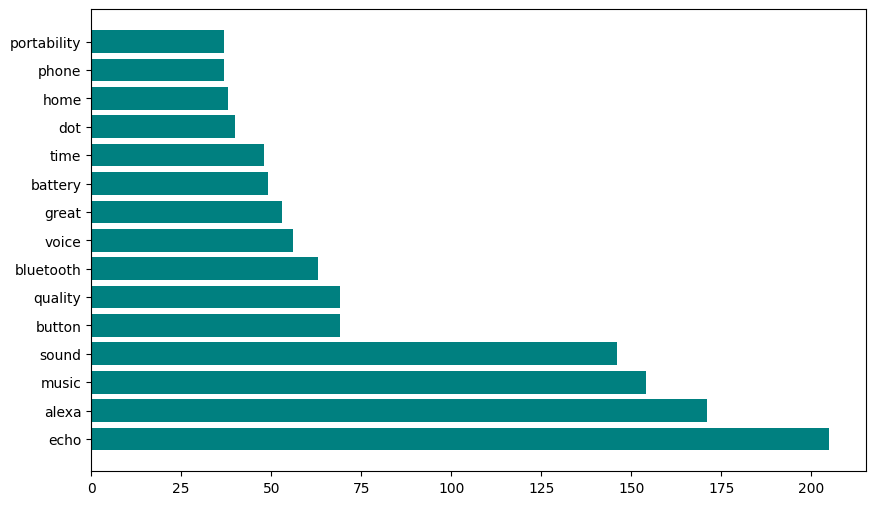

In [67]:
plt.figure(figsize=[10,6])
plt.barh(list(res.keys()), list(res.values()), color="teal")
plt.show()

In [69]:
# !pip install wordcloud

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 399.5, 199.5, -0.5)

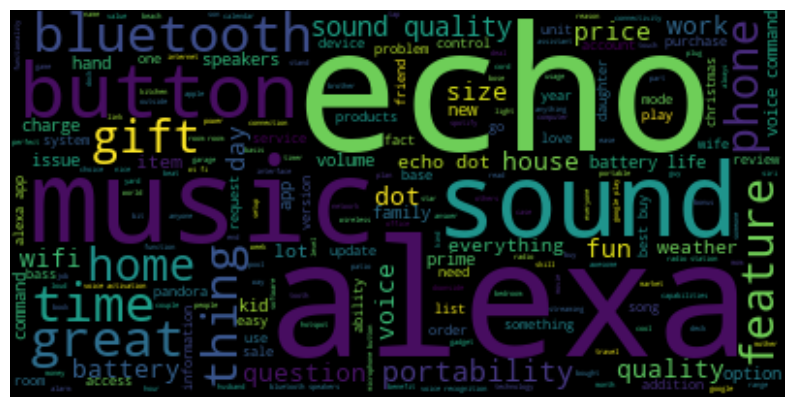

In [73]:
textall = " ".join(all_nouns_clean)
wordcloud = WordCloud().generate(textall)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")